In [2]:
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

C:\Users\Sushant\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
train_df = pd.read_csv('train.csv')

In [5]:
test_df = pd.read_csv('test.csv')

In [6]:
combined = [train_df, test_df]

In [7]:
print(train_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [8]:
p1bool = train_df['Pclass'] == 1
print(p1bool.head())

0    False
1     True
2    False
3     True
4    False
Name: Pclass, dtype: bool


In [9]:
p1 = train_df[p1bool]
print(p1.head())

    PassengerId  Survived  Pclass  \
1             2         1       1   
3             4         1       1   
6             7         0       1   
11           12         1       1   
23           24         1       1   

                                                 Name     Sex   Age  SibSp  \
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   

    Parch    Ticket     Fare Cabin Embarked  
1       0  PC 17599  71.2833   C85        C  
3       0    113803  53.1000  C123        S  
6       0     17463  51.8625   E46        S  
11      0    113783  26.5500  C103        S  
23      0    113788  35.5000    A6        S  


In [10]:
rate_p1 = len(p1[p1['Survived'] == 1])/len(p1)
print(rate_p1)

0.6296296296296297


In [11]:
w_df = train_df[train_df['Sex'] == 'female']
m_df = train_df[train_df['Sex'] == 'male']

In [12]:
print(w_df.head())
print(m_df.head())

   PassengerId  Survived  Pclass  \
1            2         1       1   
2            3         1       3   
3            4         1       1   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
8  Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   

   Parch            Ticket     Fare Cabin Embarked  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
8      2            347742  11.1333   NaN        S  
9      0            237736  30.0708   NaN        C  
  

In [13]:
rate_w = len(w_df[w_df['Survived'] == 1])/len(w_df)
print('Rate of survival of women')
print(rate_w)

Rate of survival of women
0.7420382165605095


In [14]:
rate_m = len(m_df[m_df['Survived'] == 1])/len(m_df)
print('Rate of survival of men')
print(rate_m)

Rate of survival of men
0.18890814558058924


C:\Users\Sushant\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


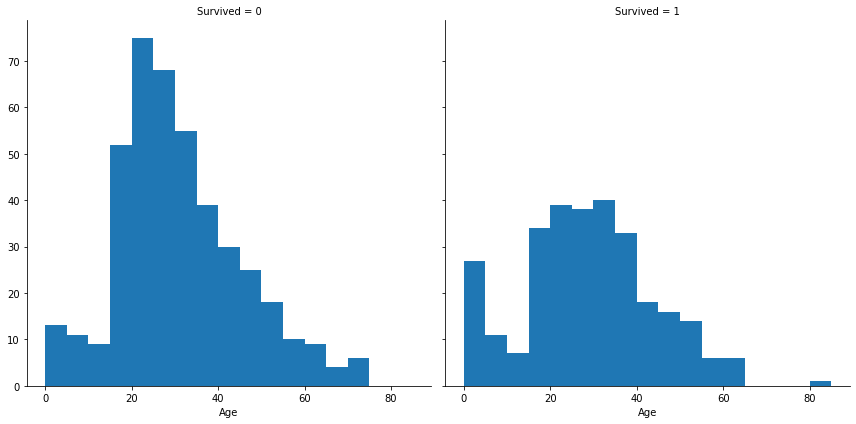

In [15]:
hist1 = sns.FacetGrid(train_df,col='Survived',size=6)
hist1.map(plt.hist,'Age',bins=range(0,90,5))

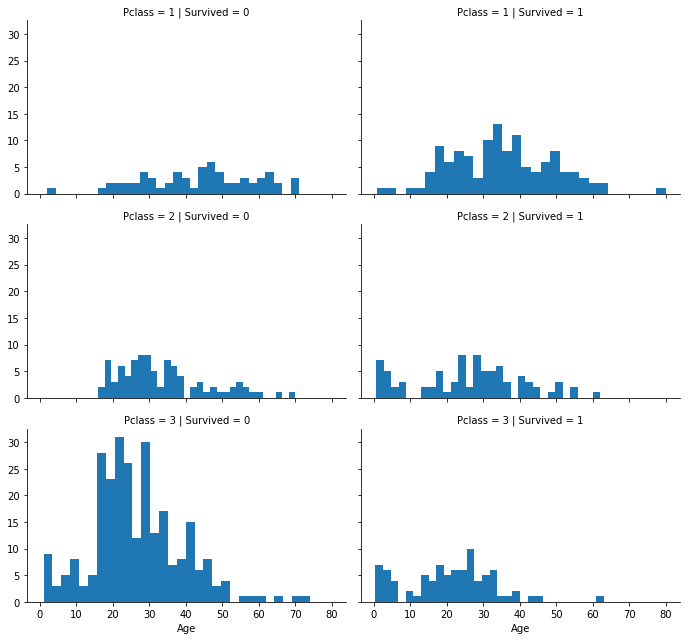

In [16]:
hist2 = sns.FacetGrid(train_df,row='Pclass',col='Survived',aspect=1.6, size=3)
hist2.map(plt.hist,'Age',bins=30)
hist2.add_legend()

C:\Users\Sushant\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


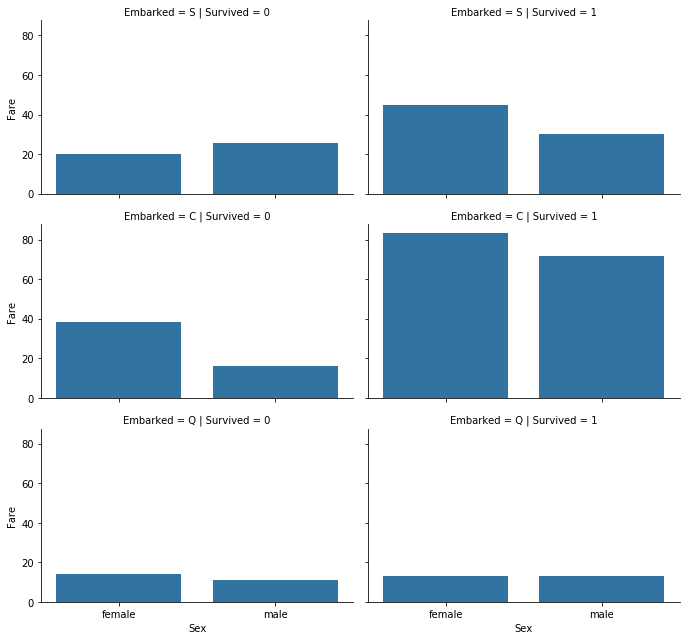

In [17]:
hist3 = sns.FacetGrid(train_df, row='Embarked', col='Survived', size=3, aspect=1.6)
hist3.map(sns.barplot, 'Sex', 'Fare', ci = None)
hist3.add_legend()

In [18]:
train_df['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

In [19]:
perc = 681/891*100
print('Percentage of unique values')
print(perc)
print('Percentage of duplicate values')
print(100 - perc)

Percentage of unique values
76.43097643097643
Percentage of duplicate values
23.56902356902357


In [20]:
combined_df = pd.concat(combined, sort=True)
print(combined_df.isna().sum())
print(combined_df.describe(include = ["O"]))

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64
              Cabin Embarked              Name   Sex    Ticket
count           295     1307              1309  1309      1309
unique          186        3              1307     2       929
top     C23 C25 C27        S  Kelly, Mr. James  male  CA. 2343
freq              6      914                 2   843        11


In [21]:
m = {'male' : 0, 'female' : 1}
for df in combined:
    df['Gender'] = df['Sex'].map(m).astype(int)
combined[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [22]:
combined_df.head()   

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [23]:
for df in combined:
    for i in range (0, len(df)):
        if np.isnan(df["Age"][i]) == True:
            df["Age"][i] = np.random.uniform(low=df['Age'].std(), high=df['Age'].median())

combined[1].head()

C:\Users\Sushant\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [24]:
print("After using KNN value")

train_df['Age'] = train_df['Age'].apply(lambda x: np.random.randint(high = 29.699118, low = 14.526497) if np.isnan(x) else x)

imputer = KNNImputer(n_neighbors=2)
df_filled = imputer.fit_transform(train_df.loc[:,train_df.columns.isin(['Age','Fare','SibSp','Parch','Gender','Survived'])])

print(df_filled)

df_filled = pd.DataFrame(df_filled , columns =['Survived','Gender','Age','SibSp','Parch','Fare'] )

df_filled['Name'] = train_df['Name']
df_filled['Ticket'] = train_df['Ticket']
df_filled['Cabin'] = train_df['Cabin']
df_filled['Pclass'] = train_df['Pclass']
df_filled['PassengerId'] = train_df['PassengerId']
df_filled['Embarked'] = train_df['Embarked']

df_filled.head()

After using KNN value
[[ 0.         22.          1.          0.          7.25        0.        ]
 [ 1.         38.          1.          0.         71.2833      1.        ]
 [ 1.         26.          0.          0.          7.925       1.        ]
 ...
 [ 0.         19.35577238  1.          2.         23.45        1.        ]
 [ 1.         26.          0.          0.         30.          0.        ]
 [ 0.         32.          0.          0.          7.75        0.        ]]


,Survived,Gender,Age,SibSp,Parch,Fare,Name,Ticket,Cabin,Pclass,PassengerId,Embarked
0,0.0,22.0,1.0,0.0,7.2500,0.0,"Braund, Mr. Owen Harris",A/5 21171,NaN,3,1,S
1,1.0,38.0,1.0,0.0,71.2833,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,C85,1,2,C
2,1.0,26.0,0.0,0.0,7.9250,1.0,"Heikkinen, Miss. Laina",STON/O2. 3101282,NaN,3,3,S
3,1.0,35.0,1.0,0.0,53.1000,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,C123,1,4,S
4,0.0,35.0,0.0,0.0,8.0500,0.0,"Allen, Mr. William Henry",373450,NaN,3,5,S


In [26]:
freq_embarked = train_df.Embarked.dropna().mode()[0]
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_embarked)
    
train_df[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [ ]:
test_df['Fare'].fillna(test_df['Fare'].dropna().mode(), inplace=True)
test_df.head()

In [28]:
train_df['FareBand'] = pd.qcut(train_df['Fare'], 4)
train_df[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)


for row in combined:
    row.loc[ row['Fare'] <= 7.91, 'Fare'] = 0
    row.loc[(row['Fare'] > 7.91) & (row['Fare'] <= 14.454), 'Fare'] = 1
    row.loc[(row['Fare'] > 14.454) & (row['Fare'] <= 31), 'Fare']   = 2
    row.loc[ row['Fare'] > 31, 'Fare'] = 3
    row['Fare'] = row['Fare'].astype(float)

train_df = train_df.drop(['FareBand'], axis=1)
combined = [train_df, test_df]
    
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,0.0,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,3.0,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,1.0,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,3.0,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,1.0,NaN,S,0
